In [ ]:
# This code is based off the following kernels/articles:
# [1] Leifuer (2019) Flowers with Transfer Learning (MobileNet-Keras). https://www.kaggle.com/leifuer/flowers-with-transfer-learning-mobilenet-keras
# [2] Culfaz, F. (2018) Transfer Learning using Mobilenet and Keras. https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

In [ ]:
!pip install tfds-nightly
!pip install tensorflow_datasets --upgrade

     |████████████████████████████████| 3.9MB 17.7MB/s 
     |████████████████████████████████| 3.7MB 20.3MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
#For weeds
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow as tf
dataset_name = "deep_weeds"
(training_set, validation_set), dataset_info = tfds.load(
    dataset_name, split=['train[:80%]', 'train[80%:]'], with_info=True, as_supervised=True
)
num_classes = dataset_info.features['label'].num_classes

Dataset deep_weeds downloaded and prepared to /root/tensorflow_datasets/deep_weeds/3.0.0. Subsequent calls will reuse this data.


In [ ]:
num_classes = dataset_info.features['label'].num_classes
num_training_examples = 0
num_validation_examples = 0

for _ in training_set:
    num_training_examples +=1

for _ in validation_set:
    num_validation_examples +=1

In [ ]:
IMAGE_RES = 224
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label

BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMAGE_RES, IMAGE_RES, 3),include_top=False, weights='imagenet')

In [ ]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
base_model.trainable= False
x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(num_classes,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
#model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.trainable = True
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

EPOCHS = 20

history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/20
438/438 [==============================] - 102s 214ms/step - loss: 0.9127 - accuracy: 0.6986 - val_loss: 4.5108 - val_accuracy: 0.5091
Epoch 2/20
438/438 [==============================] - 96s 216ms/step - loss: 0.2675 - accuracy: 0.9110 - val_loss: 3.3137 - val_accuracy: 0.5274
Epoch 3/20
438/438 [==============================] - 96s 216ms/step - loss: 0.1189 - accuracy: 0.9598 - val_loss: 3.0982 - val_accuracy: 0.5385
Epoch 4/20
438/438 [==============================] - 97s 217ms/step - loss: 0.0606 - accuracy: 0.9826 - val_loss: 2.7625 - val_accuracy: 0.6379
Epoch 5/20
438/438 [==============================] - 97s 217ms/step - loss: 0.0490 - accuracy: 0.9833 - val_loss: 2.7626 - val_accuracy: 0.6779
Epoch 6/20
438/438 [==============================] - 97s 218ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 3.2675 - val_accuracy: 0.6482
Epoch 7/20
438/438 [==============================] - 97s 218ms/step - loss: 0.0322 - accuracy: 0.9874 - val_loss: 2.1658 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


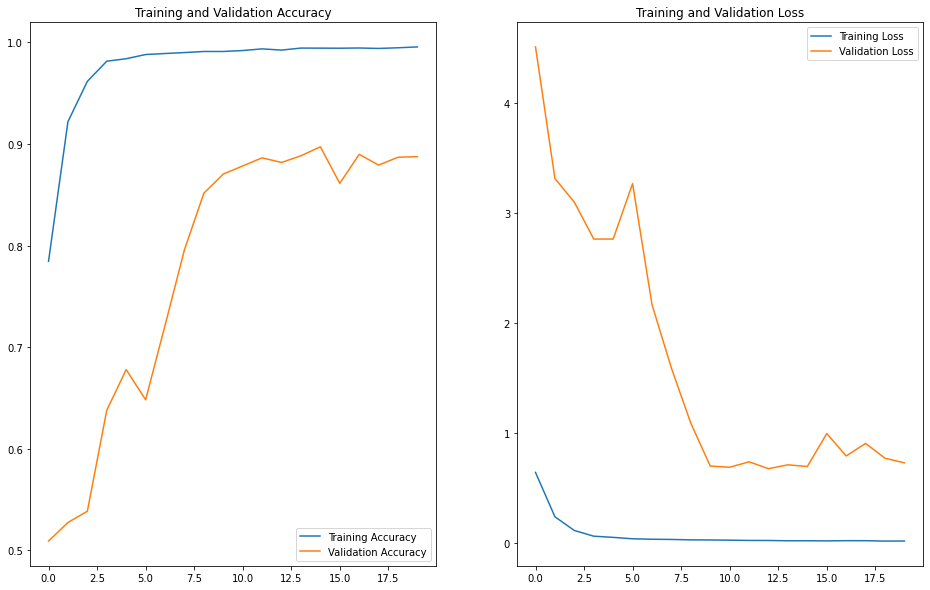

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()